In [2]:
!pip install pillow

  Using cached https://files.pythonhosted.org/packages/8c/92/2975b464d9926dc667020ed1abfa6276e68c3571dcb77e43347e15ee9eed/Pillow-9.2.0.tar.gz
  ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-g1jmshm6/pillow/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-jcjhwut2 --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/ImageTransform.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/_tkinter_finder.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/ImageColor.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/MicImagePlugin.py -> build/lib.linux-x86_64-3.7/PIL
  copying src/PIL/EpsImagePlugin.py -> b

Failed to build pillow
  Running setup.py install for pillow ... error
    ERROR: Complete output from command /snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-g1jmshm6/pillow/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-71ujtalu/install-record.txt --single-version-externally-managed --compile --user --prefix=:
    ERROR: running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.7
    creating build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/ImageTransform.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/_tkinter_finder.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/ImageColor.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/MicImagePlugin.py -> build/lib.linux-x86_64-3.7/PIL
    copying src/PIL/EpsIma

ERROR: Command "/snap/jupyter/6/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-g1jmshm6/pillow/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-71ujtalu/install-record.txt --single-version-externally-managed --compile --user --prefix=" failed with error code 1 in /tmp/pip-install-g1jmshm6/pillow/


In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

import numpy as np

import matplotlib.pyplot as plt
import json

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
epochs_fields = [epoch for epoch in open('../ROBOT_1_blue|potential_field.log').read().split('||')]
w = 0.750 * 2
h = 0.650 * 2
plt.rcParams["figure.figsize"] = (85/2, 75/2)
font = {'weight': 'bold','size' : 46}

plt.rc('font', **font)
plt.style.use('seaborn-dark-palette')

/tmp/ipykernel_490320/2408081210.py:9: RuntimeWarning: invalid value encountered in true_divide
  u_norm = [(np.array([a[0], a[1]])/np.linalg.norm([a[0], a[1]]))[0] for a in zip(u, v)]
/tmp/ipykernel_490320/2408081210.py:10: RuntimeWarning: invalid value encountered in true_divide
  v_norm = [(np.array([a[0], a[1]])/np.linalg.norm([a[0], a[1]]))[1] for a in zip(u, v)]


()

(1.5, 1.3)

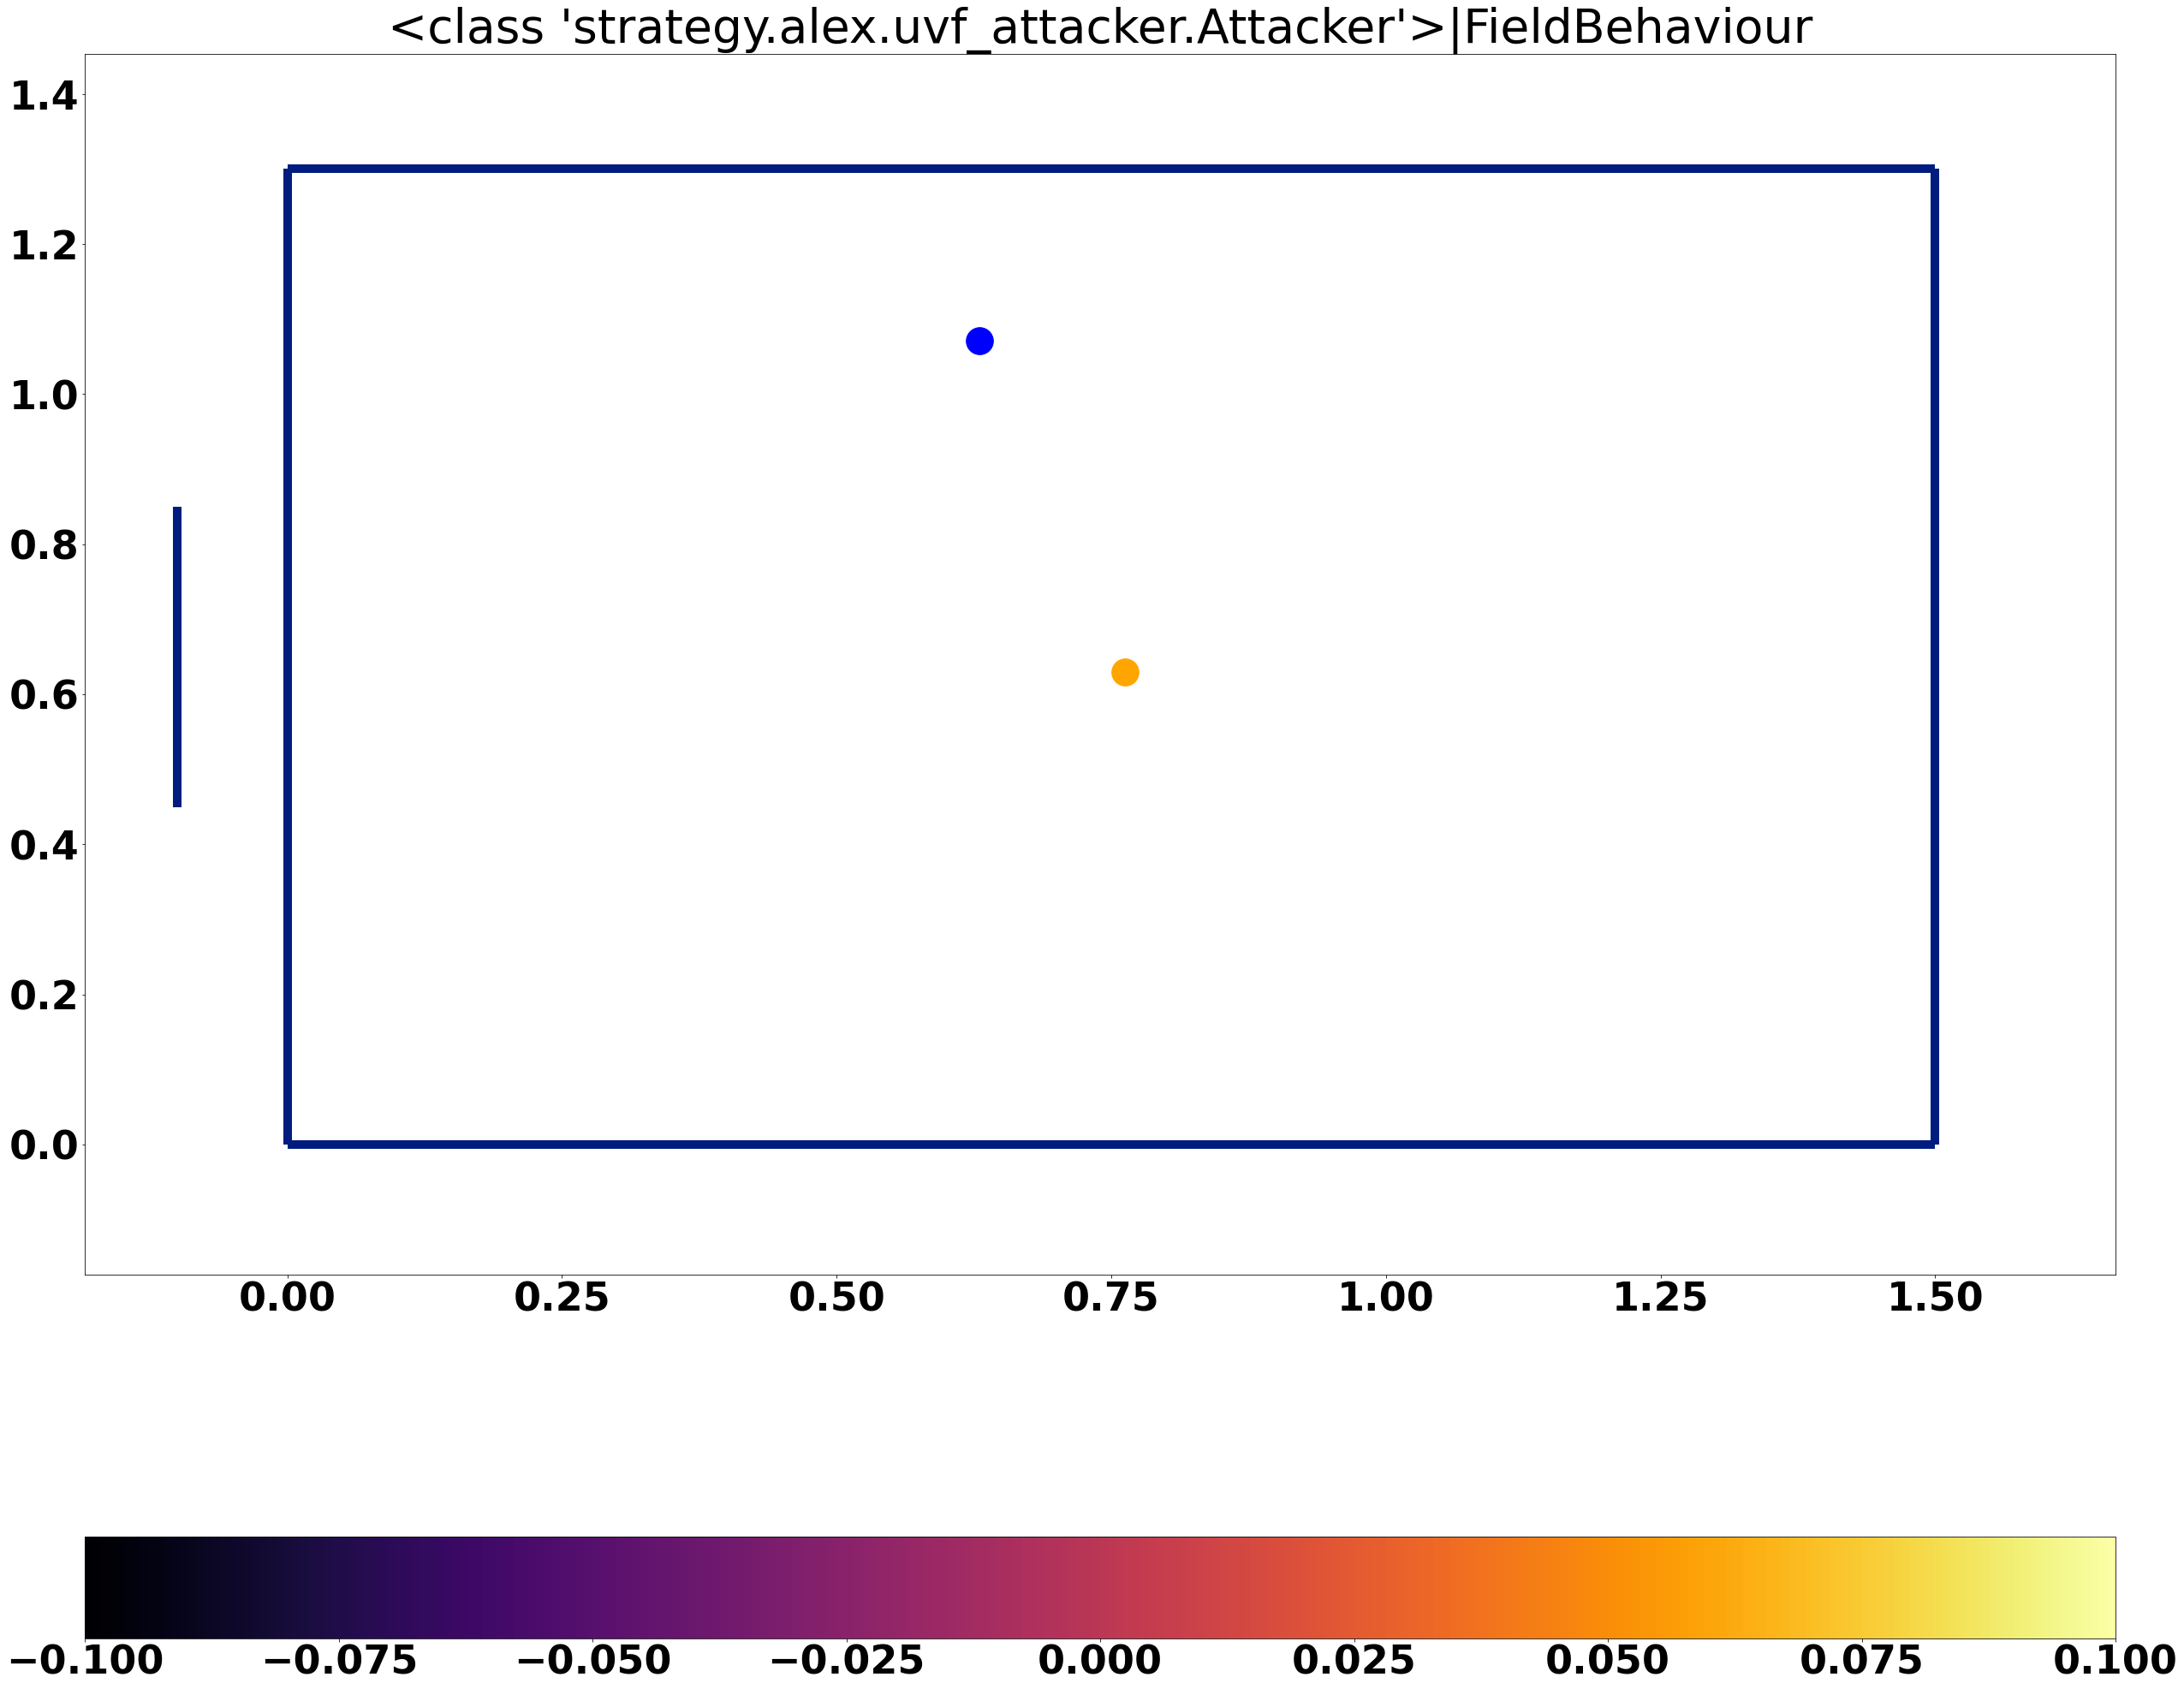

In [11]:
def series(epoch_num):
    epoch_num = min(epoch_num, max(0, len(epochs_fields)-1))
    epoch = json.loads(epochs_fields[epoch_num])
    x = np.array(epoch['x'])
    y = np.array(epoch['y'])
    u = np.array(epoch['u'])
    v = np.array(epoch['v'])
    
    u_norm = [(np.array([a[0], a[1]])/np.linalg.norm([a[0], a[1]]))[0] for a in zip(u, v)]
    v_norm = [(np.array([a[0], a[1]])/np.linalg.norm([a[0], a[1]]))[1] for a in zip(u, v)]
    
    m=np.sqrt(u**2+v**2)
    
    q = plt.quiver(x, y, u_norm, v_norm, m, units='xy', angles='xy', scale_units='xy', scale=50, cmap='inferno')
    plt.scatter(epoch['robot_x'], epoch['robot_y'], c='blue', s=1000)
    plt.scatter(epoch['ball_x'], epoch['ball_y'], c='orange', s=1000)
    
    plt.vlines(0, 0, h,linewidth=10.0)
    plt.vlines(w, 0, h,linewidth=10.0)
    plt.hlines(0, 0, w,linewidth=10.0)
    plt.hlines(h, 0, w,linewidth=10.0)
    plt.vlines(-0.1, h/2 - 0.2, h/2 + 0.2,linewidth=10.0)
    plt.title(epoch['behaviour'])
    
    plt.colorbar(q, orientation="horizontal")
    return()

interact(series, epoch_num= (0, len(epochs_fields)-2, 1) )
w, h